<a href="https://colab.research.google.com/github/1boge/my_repos/blob/master/houses_afan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.


Данные вы сможете получить исполнив следующий код:

from sklearn.datasets import load_boston

import pandas as pd

data = pd.read_csv(load_boston()[‘filename’], skiprows=1)


Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])


Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.


Цель задания - закрепить полученные навыки.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [8]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['MEDV'] = pd.Series(boston_data.target)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

Будем использовать линейную регрессию для тестирования качества данных

In [10]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

Для поиска выбросов будем использовать boxplot

In [11]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass    

Для заполнения пропущенных значений будем использовать стандартные способы
- заполнение значением
- max
- min
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [12]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None):
  if mode == 'value':
    X.loc[X[X[column].isna()].index ,column] = value
  elif mode == 'max':
    X.loc[X[X[column].isna()].index ,column] = X[column].max()
  elif mode == 'min':
    X.loc[X[X[column].isna()].index ,column] = X[column].min()
  elif mode == 'median':
    X.loc[X[X[column].isna()].index ,column] = X[column].median()    
  elif mode == 'mode':
    X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]  
  elif mode == 'indicator':
    X.loc[X[X[column].isna()].index, column] = 0
    X['ind_'+str(column)] = 0
    X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
  elif mode == 'linreg':
    if columns_for_reg is None:
      cols = list(X.select_dtypes([np.number]).columns) 
      cols.remove(column)
    else:
      cols = columns_for_reg
    X_tmp = X.dropna()  
    m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
    X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
  else:
    X.loc[X[X[column].isna()].index, column] = X[column].mean()
  return X  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
# Проверка на пропуски в данных
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


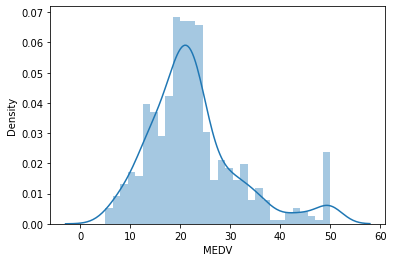

In [18]:
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [19]:
X = df.loc[:, df.columns != 'MEDV']
y = df[['MEDV']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = linReg.predict(X_test)
linReg.score(X_test, y_test)

0.7112260057484874

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


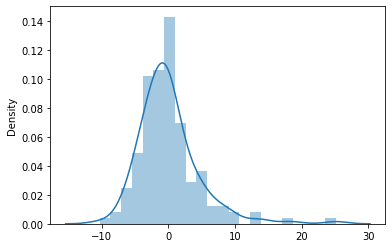

In [23]:
#Распределение ошибки
er = y_test - predictions
sns.distplot(er)

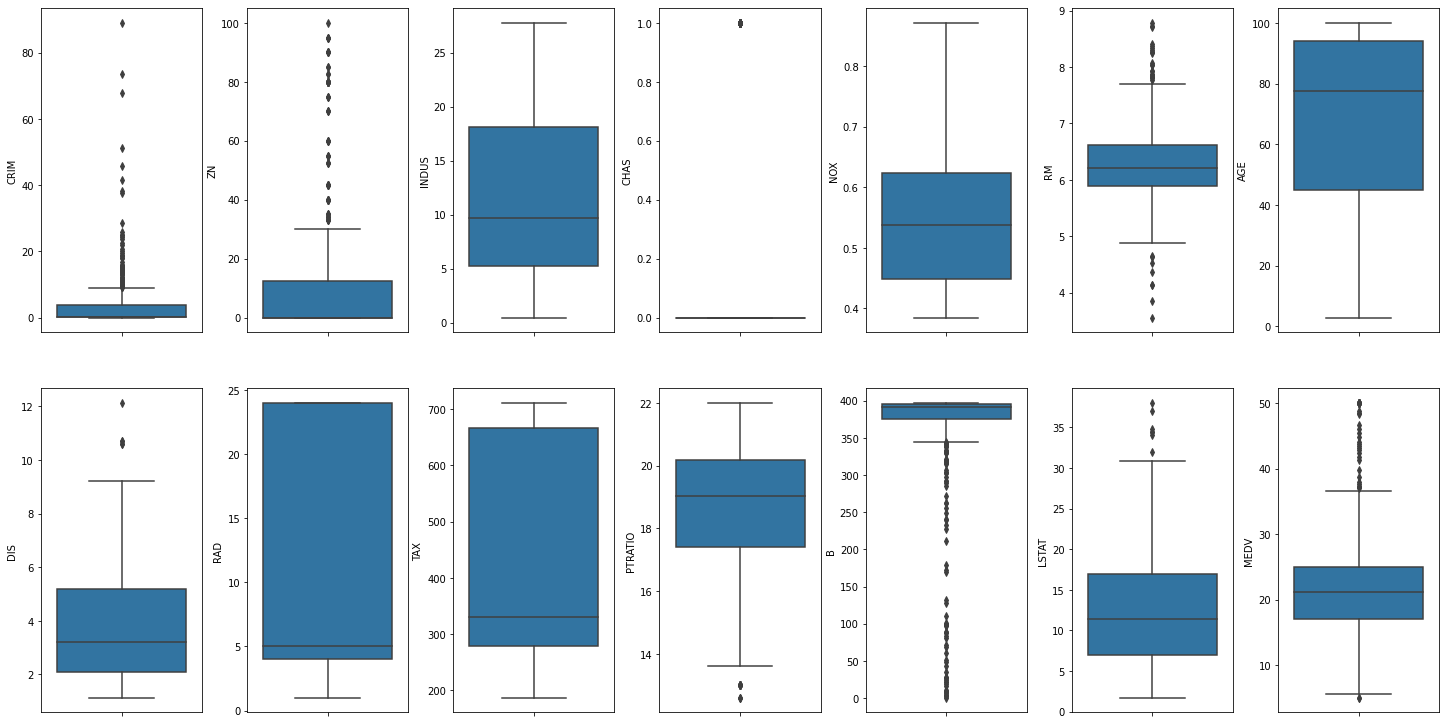

In [24]:
#Вылеты по признакам
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

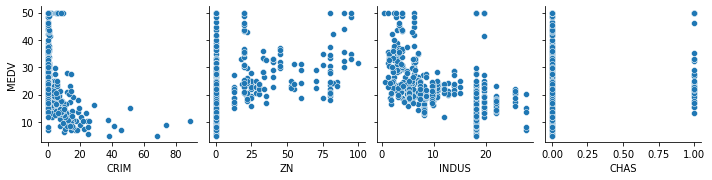

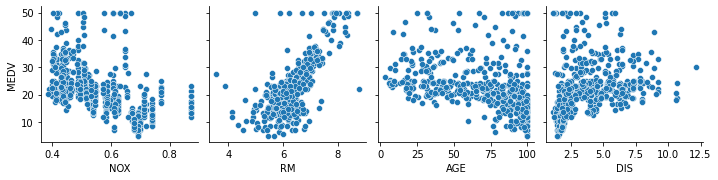

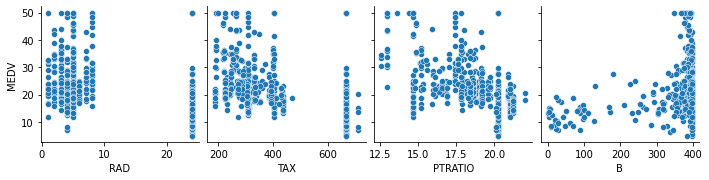

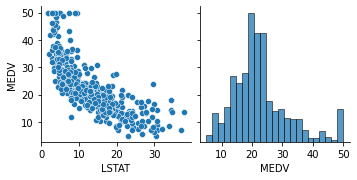

In [26]:
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
             x_vars=df.columns[i:i+4],
             y_vars=['MEDV'])

In [27]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [28]:
#Удаление вылетов
df = df[~(df['MEDV'] >= 50.0)]
df.shape

(490, 14)

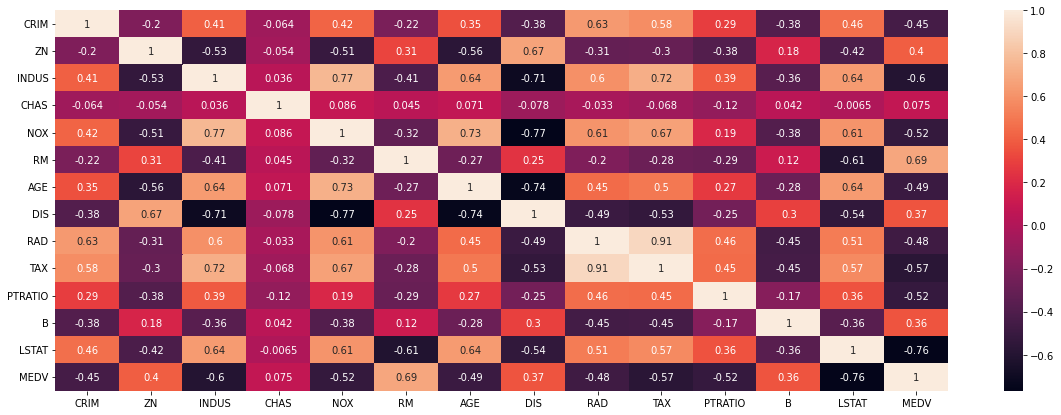

In [29]:
plt.figure(figsize=(20, 7))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [30]:
selected_cols = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'DIS', 'AGE','B','TAX']
X = df[selected_cols]
y = df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

linReg = LinearRegression()
linReg.fit(X_train, y_train)

predictions = linReg.predict(X_test)
linReg.score(X_test, y_test)

0.7337540605805972

In [31]:
#Можно попробовать применить скейлер
min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=selected_cols)
X_scaled.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,DIS,AGE,B,TAX
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.268711,0.641607,1.000000,0.208015
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.348524,0.782698,1.000000,0.104962
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.348524,0.599382,0.989737,0.104962
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.448173,0.441813,0.994276,0.066794
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.448173,0.528321,1.000000,0.066794


In [32]:
#Можно применить логарифмирование
y = np.log1p(y)
for col in X_scaled.columns:
    if np.abs(X_scaled[col].skew()) > 0.3:
        X_scaled[col] = np.log1p(X_scaled[col])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
linReg = LinearRegression()

linReg.fit(X_train, y_train)

predictions = linReg.predict(X_test)
linReg.score(X_test, y_test)

0.7575268858832177